<a href="https://colab.research.google.com/github/Paul-Bett/MLFC/blob/main/_notebooks/practicals/03-dataset-joining-practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3: Dataset Joining and Access-Assess-Address Framework

### Radzim Sendyka

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2025-09-08

**Abstract**: In this lab session we will explore dataset joining
techniques, implement the Access-Assess-Address framework in practice,
work with the DSAIL Porini camera trap data, and build predictive models
for animal sightings.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## Code Reuse with Fynesse

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-code-reuse-fynesse.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-code-reuse-fynesse.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

{We will be reusing some of the functions we created in the first
practical. This demonstrates one of the key principles of data science:
building reusable code libraries that can be applied across multiple
projects.

In [31]:
%%capture
%pip install osmnx

### Exercise 1

Install your Fyness library, and run code to show its available.

In [32]:
# Write your answer to Exercise 1 here

import shutil
import os

# Remove the directory if it exists
if os.path.exists("/content/fynesse_template"):
    shutil.rmtree("/content/fynesse_template")

!git clone https://github.com/Paul-Bett/fynesse_template.git
import subprocess, importlib, sys
sys.path.append("/content/fynesse_template")
import fynesse




Cloning into 'fynesse_template'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 229 (delta 7), reused 6 (delta 6), pack-reused 218 (from 2)
Receiving objects: 100% (229/229), 151.50 KiB | 12.62 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [33]:
# Example: Plot a city map using your reusable function
# fynesse.access.plot_city_map('Nyeri, Kenya', -0.4371, 36.9580, 2)

## DSAIL-Porini Dataset

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Head over to https://data.mendeley.com/datasets/6mhrhn7rxc/6 to explore
the DSAIL-Porini dataset. This dataset contains camera trap images and
annotations from Kenya, providing rich information about wildlife
patterns and behavior.

Locate the `camera_trap_dataset_annotation.xlsx` file and make it
available in this notebook.

In [34]:
import os
import requests
import pandas as pd

In [35]:
def download_if_not_exists(url, filepath):
    """Download file if it doesn't exist locally"""
    if os.path.exists(filepath):
        print(f"File already exists: {filepath}")
    else:
        print(f"Downloading: {url}")
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Downloaded to: {filepath}")
    return filepath

In [36]:
# Download the DSAIL-Porini dataset
porini_file = download_if_not_exists(
    'https://data.mendeley.com/public-files/datasets/6mhrhn7rxc/files/641e83c9-16a3-485c-b247-b5701f8a5540/file_downloaded',
    'camera_trap_dataset_annotation.xlsx'
)

File already exists: camera_trap_dataset_annotation.xlsx


In [37]:
porini_df = pd.read_excel(porini_file)
porini_df

,Filename,Device,Species,Count,Sex,Latitude,Longitude
0,2021-08-01-07-31-10.jpg,Raspberry Pi 2,IMPALA,4,"MALE,FEMALE,FEMALE,FEMALE",-0.390386,36.962348
1,2021-08-01-07-31-13.jpg,Raspberry Pi 2,IMPALA,2,"MALE,FEMALE",-0.390386,36.962348
2,2021-08-01-07-31-35.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
3,2021-08-01-07-31-41.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
4,2021-08-01-07-31-45.jpg,Raspberry Pi 2,IMPALA,1,FEMALE,-0.390386,36.962348
...,...,...,...,...,...,...,...
8519,snapshot_201910949580242.jpg,OpenMV Cam H7,IMPALA,2,"MALE,FEMALE",-0.390381,36.962333
8520,snapshot_201910949581191.jpg,OpenMV Cam H7,IMPALA,2,"MALE,FEMALE",-0.390381,36.962333
8521,snapshot_201910949582145.jpg,OpenMV Cam H7,IMPALA,2,"MALE,FEMALE",-0.390381,36.962333
8522,snapshot_201910949583276.jpg,OpenMV Cam H7,IMPALA,2,CAN'T TELL,-0.390381,36.962333


## Joining Datasets

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-joining.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-joining.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Exercise 2

Geospatial data is particularly useful because it is the most common
index in the world, over which so many datasets can be joined. Find the
coordinate information in the dataset, and plot it on top of an OSM map.

You may want to deduplicate the coordinates before you plot!

               Device  Latitude  Longitude
0      Raspberry Pi 2 -0.390386  36.962348
1      Raspberry Pi 2 -0.390386  36.962331
2      Raspberry Pi 2 -0.388557  36.961408
3      Raspberry Pi 2 -0.386616  36.965402
4      Raspberry Pi 2 -0.386405  36.964172
5      Raspberry Pi 2 -0.390772  36.962500
6      Raspberry Pi 2 -0.391310  36.962204
7      Raspberry Pi 2 -0.390381  36.962063
8      Raspberry Pi 2 -0.390381  36.962386
9      Raspberry Pi 2 -0.388557  36.961391
10     Raspberry Pi 2 -0.390042  36.962124
11     Raspberry Pi 2 -0.390224  36.962036
12     Raspberry Pi 2 -0.386823  36.965974
13     Raspberry Pi 2 -0.390381  36.962479
14  Raspberry Pi Zero -0.386616  36.965402
15  Raspberry Pi Zero -0.386405  36.964173
16     Raspberry Pi 2 -0.390807  36.962578
17  Raspberry Pi Zero -0.386438  36.964109
18      OpenMV Cam H7 -0.390381  36.962333

Total plotting points: 19
35


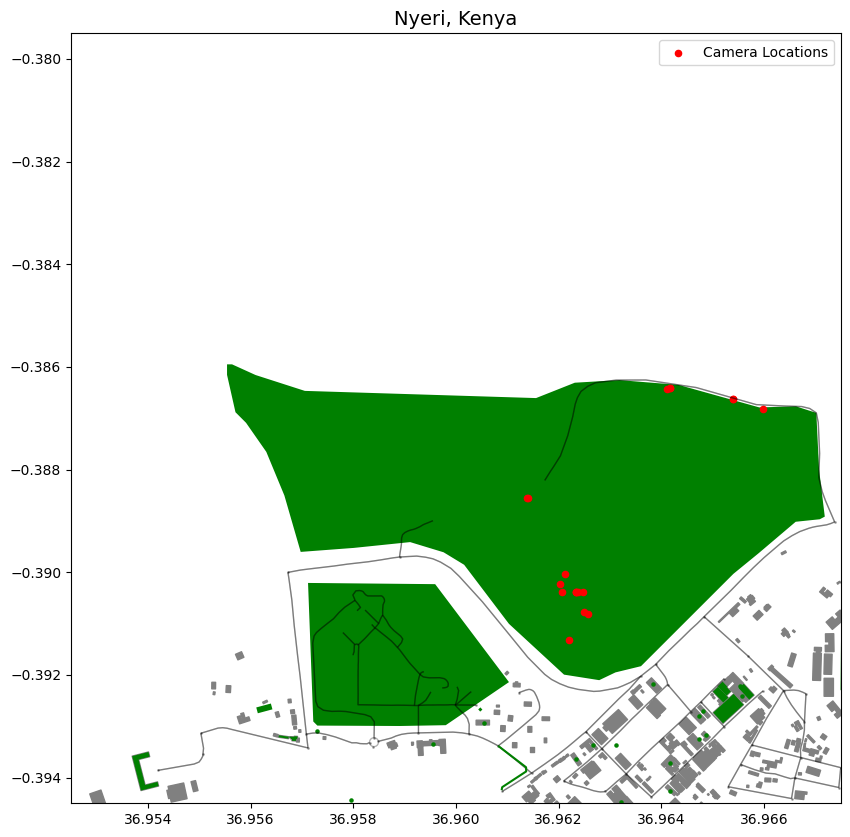

geometry addr:city  \
element id                                                
node    2968791635  POINT (36.96321 -0.39448)     Nyeri   
        2968794708  POINT (36.96311 -0.39337)       NaN   
        2968798523  POINT (36.96474 -0.39325)       NaN   
        2968799334  POINT (36.96487 -0.39317)       NaN   
        2968799843  POINT (36.96554 -0.39221)       NaN   

                                       name tourism smoking addr:street  \
element id                                                                
node    2968791635          Sunrise Hostels  hostel     NaN         NaN   
        2968794708            Mankan Hostel  hostel     NaN         NaN   
        2968798523       Alexandria Hostels  hostel     NaN         NaN   
        2968799334  Congobrazzaville Hostel  hostel     NaN         NaN   
        2968799843             Ken's Hostel  hostel     NaN         NaN   

                   amenity wikidata wikipedia information  ... fixme:type  \
element id                                                 ...              
node    2968791635     NaN      NaN       NaN         NaN  ...        NaN   
        2968794708     NaN      NaN       NaN         NaN  ...        NaN   
        2968798523     NaN      NaN       NaN         NaN  ...        NaN   
        2968799334     NaN      NaN       NaN         NaN  ...        NaN   
        2968799843     NaN      NaN       NaN         NaN  ...        NaN   

                   building description artwork_type leisure operator  \
element id                                                              
node    2968791635      NaN         NaN          NaN     NaN      NaN   
        2968794708      NaN         NaN          NaN     NaN      NaN   
        2968798523      NaN         NaN          NaN     NaN      NaN   
        2968799334      NaN         NaN          NaN     NaN      NaN   
        2968799843      NaN         NaN          NaN     NaN      NaN   

                   operator:short operator:type operator:wikidata shop  
element id                                                              
node    2968791635            NaN           NaN               NaN  NaN  
        2968794708            NaN           NaN               NaN  NaN  
        2968798523            NaN           NaN               NaN  NaN  
        2968799334            NaN           NaN               NaN  NaN  
        2968799843            NaN           NaN               NaN  NaN  

[5 rows x 22 columns]

In [38]:
# Write your answer to Exercise 2 here

import osmnx as ox
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

porini_df_coords = porini_df[['Device','Latitude', 'Longitude']].drop_duplicates().dropna().reset_index(drop=True)
print(porini_df_coords)
print("\nTotal plotting points: " + str(len(porini_df_coords)))



place_name = "Nyeri, Kenya"
latitude = -0.3870
longitude = 36.96
placestub = place_name.lower().replace(' ', '-').replace(',','')


box_width = 0.015 # About 1.1 km
box_height = 0.015
north = latitude + box_height/2
south = latitude - box_height/2
west = longitude - box_width/2
east = longitude + box_width/2
bbox = (west, south, east, north)

# Get graph from location
graph = ox.graph_from_bbox(bbox)
# City area
area = ox.geocode_to_gdf(place_name)
# Street network
nodes, edges = ox.graph_to_gdfs(graph)
# Buildings
buildings = ox.features_from_bbox(bbox, tags={"building": True})


# Retrieve POIs
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True,
    "forest": True
}


pois = ox.features_from_bbox(bbox, tags)

print(len(pois))


fig, ax = plt.subplots(figsize=(10,10))
area.plot(ax=ax, color="tan", alpha=0.5)
buildings.plot(ax=ax, facecolor="gray", edgecolor="gray")
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)
nodes.plot(ax=ax, color="black", markersize=1, alpha=0.3)
pois.plot(ax=ax, color="green", markersize=5, alpha=1)
ax.scatter(porini_df_coords['Longitude'], porini_df_coords['Latitude'], color='red', s=20, label='Camera Locations') # Add camera locations
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_title(place_name, fontsize=14)
plt.legend()
plt.show()

pois.head()

<!-- Dsail Porini Address -->

## Sighting Predictions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-preprocessing.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-data-preprocessing.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will use the dataset to create a simple prediction model for the
likelihood of animal sightings.

Let’s follow a minimal example of the Access-Assess-Address framework!

Reminder about Neil’s article on the framework
[here](https://inverseprobability.com/talks/notes/access-assess-address-a-pipeline-for-automated-data-science.html).

### Access

Access is already done, partly years ago by the DSAIL team, and two
cells above by us. Example tasks within access would be:

-   Setting up the cameras in the woods (done)
-   Collecting the pictures (done)
-   Labeling the dataset (done)
-   Making the excel file online accessible (done)
-   Downloading the file (done just now)}

In [39]:
porini_df.head()

,Filename,Device,Species,Count,Sex,Latitude,Longitude
0,2021-08-01-07-31-10.jpg,Raspberry Pi 2,IMPALA,4,"MALE,FEMALE,FEMALE,FEMALE",-0.390386,36.962348
1,2021-08-01-07-31-13.jpg,Raspberry Pi 2,IMPALA,2,"MALE,FEMALE",-0.390386,36.962348
2,2021-08-01-07-31-35.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
3,2021-08-01-07-31-41.jpg,Raspberry Pi 2,IMPALA,2,FEMALE,-0.390386,36.962348
4,2021-08-01-07-31-45.jpg,Raspberry Pi 2,IMPALA,1,FEMALE,-0.390386,36.962348


### Assess

Have a look at the dataset for any issues that could stop us from being
able to cleanly analyse it.

Some issues:

-   Timestamps not readilly available. Hidden in image filenames.
-   No timestamps available for one of the cameras.
-   No Camera ID, but can be deduced from coordinates.

Decide how it would be best to address these and potentially other
issues with the data.

We would like an output dataframe that has a column for counts each
animal was spotted by each camera, and rows for each day in the
available range. You might want to use this opportunity to practice
[Pandas
MultiIndex](https://pandas.pydata.org/docs/user_guide/advanced.html).

In [40]:
import pandas as pd
import numpy as np
import re

In [41]:
# Copy original
df = porini_df.copy()

# Normalize species and parse counts
df["Species"] = df["Species"].astype(str).str.strip()

# Extract timestamp from filename
pat = re.compile(r"(\d{4})-(\d{2})-(\d{2})-(\d{2})-(\d{2})-(\d{2})")
def parse_ts(name):
    m = pat.search(str(name))
    if not m:
        return pd.NaT
    y, M, d, h, m_, s = map(int, m.groups())
    return pd.Timestamp(y, M, d, h, m_, s)

df["timestamp"] = df["Filename"].map(parse_ts)
df["date"] = df["timestamp"].dt.date

# Camera ID from rounded lat/lon
df["Latitude"] = df["Latitude"].round(4)
df["Longitude"] = df["Longitude"].round(4)
coord_key = df["Latitude"].astype(str) + "," + df["Longitude"].astype(str)
codes, _ = pd.factorize(coord_key)
df["camera_id"] = pd.Series(codes).map(lambda i: f"C{int(i)+1:03d}")

# Extract camera coordinates dictionary (rounded)
camera_coords = (
    df.drop_duplicates(subset="camera_id")[["camera_id", "Latitude", "Longitude"]]
      .set_index("camera_id")
      .sort_index()
      .apply(tuple, axis=1)
      .to_dict()
)

# Group and count: number of pictures per species per camera per day
daily = (
    df.dropna(subset=["date"])
      .groupby(["date", "camera_id", "Species"])
      .size()
      .reset_index(name="photo_count")
      .pivot_table(index="date", columns=["camera_id", "Species"], values="photo_count", aggfunc="sum")
      .fillna(0)
      .astype(int)
      .sort_index()
)

# Fill missing dates
if not daily.empty:
    full_idx = pd.date_range(start=daily.index.min(), end=daily.index.max(), freq="D").date
    daily = daily.reindex(full_idx).fillna(0).astype(int)
    daily.index.name = "date"

print(camera_coords)
daily.tail()

{'C001': (-0.3904, 36.9623), 'C002': (-0.3886, 36.9614), 'C003': (-0.3866, 36.9654), 'C004': (-0.3864, 36.9642), 'C005': (-0.3908, 36.9625), 'C006': (-0.3913, 36.9622), 'C007': (-0.3904, 36.9621), 'C008': (-0.3904, 36.9624), 'C009': (-0.39, 36.9621), 'C010': (-0.3902, 36.962), 'C011': (-0.3868, 36.966), 'C012': (-0.3904, 36.9625), 'C013': (-0.3908, 36.9626), 'C014': (-0.3864, 36.9641)}


camera_id      C001                                                       \
Species    BUSHBUCK IMPALA IMPALA, MONKEY MONKEY WARTHOG WATERBUCK ZEBRA   
date                                                                       
2021-12-22        0      0              0      0       0         0     0   
2021-12-23        0      0              0      0       0         0     0   
2021-12-24        0      0              0      0       0         0     0   
2021-12-25        0      0              0      0       0         0     0   
2021-12-26        0      0              0      0       0         0     0   

camera_id      C002                    ...     C011   C012                  \
Species    BUSHBUCK CAN'T TELL IMPALA  ... BUSHBUCK IMPALA IMPALA, WARTHOG   
date                                   ...                                   
2021-12-22        0          0      0  ...        0      0               0   
2021-12-23        0          0      0  ...        0      0               0   
2021-12-24        0          0      0  ...        0      0               0   
2021-12-25        0          0      0  ...        0      0               0   
2021-12-26        0          0      0  ...        0      0               0   

camera_id        C013                                              C014  \
Species    CAN'T TELL IMPALA IMPALA, ZEBRA ZEBRA ZEBRA, IMPALA BUSHBUCK   
date                                                                      
2021-12-22          0      0             0     0             0        0   
2021-12-23          0    747           150    40            20      245   
2021-12-24        129   1577             0     0             0        0   
2021-12-25          0     22             0     0             0        0   
2021-12-26          0      5             0     0             0        0   

camera_id             
Species    WATERBUCK  
date                  
2021-12-22         0  
2021-12-23       330  
2021-12-24         0  
2021-12-25         0  
2021-12-26         0  

[5 rows x 54 columns]

Huh, looks like we have some more issues.

-   “Impala, Monkey” is not a species - should be counted towards two!
-   “Can’t Tell” shouldn’t be a species at all.
-   Some columns don’t exist (eg. `C011` has no `ZEBRA`). Let’s just
    fill them with zeros.

Additionally, there probably weren’t `1577` impalas spotted on Christmas
Eve 2021. This is a result of burst shots repetitively capturing the
same animal. For now, let’s just treat the data as binary, whether at
least one photo was taken on that day.

### Exercise 3

Use the cell below to implement the changes discussed above, and
potentially additional issues.

In [42]:
# Write your answer to Exercise 3 here


daily_bin = daily.copy()
# Step 1: Flatten the multi-index and reshape the dataframe

daily_bin.columns = pd.MultiIndex.from_tuples(daily_bin.columns)



In [55]:
# Step 2: Create a new clean dataframe
binary_rows = []
species_df = daily_bin.columns.get_level_values(1)
for (cam, species_str), series in daily_bin.items():
    # Split species (e.g. "IMPALA, MONKEY") into a list of individual species
    # Ignore the "CAN'T TELL" species
    species_list = [s.strip().upper() for s in species_str.split(',') if s.strip().upper() != "CAN'T TELL"]

    for species in species_list:
        col = series.copy()
        # Convert every value to 1 if any sightings, otherwise 0
        col = (col > 0).astype(int)
        binary_rows.append((cam, species, col))


In [56]:
# Step 3: Rebuild dataframe as binary_df

binary_df = pd.DataFrame({
    (cam, species): values
    for cam, species, values in binary_rows
}, index=daily_bin.index)

# Step 4: Create MultiIndex and
binary_df.columns = pd.MultiIndex.from_tuples(binary_df.columns)
binary_df = binary_df.sort_index(axis=1, level=[0, 1])

# Step 5: Ensure all possible (camera, species) pairs exist

# Get all unique cameras and species used across all rows and store as a list
all_cameras = daily.columns.get_level_values(0).unique().tolist() #TODO

all_species = [] #TODO
for species_str in daily.columns.get_level_values(1).unique():
        if species_str != "CAN'T TELL":
            all_species.extend([s.strip() for s in species_str.split(',') if s.strip() != "CAN'T TELL"])
        if species_str == "CAN'T TELL":
            continue
all_species = pd.unique((all_species)) #TODO

# Build full column MultiIndex
full_columns = pd.MultiIndex.from_product([all_cameras, all_species], names=["camera_id", "Species"])

# Reindex to include all possible combinations, fill missing with 0
binary_df = binary_df.reindex(columns=full_columns, fill_value=0)

binary_df.tail()

/tmp/ipython-input-961491034.py:23: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_species = pd.unique((all_species)) #TODO


camera_id      C001                                           C002         \
Species    BUSHBUCK IMPALA MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                                                                        
2021-12-22        0      0      0       0         0     0        0      0   
2021-12-23        0      0      0       0         0     0        0      0   
2021-12-24        0      0      0       0         0     0        0      0   
2021-12-25        0      0      0       0         0     0        0      0   
2021-12-26        0      0      0       0         0     0        0      0   

camera_id                  ...   C013                             C014         \
Species    MONKEY WARTHOG  ... MONKEY WARTHOG WATERBUCK ZEBRA BUSHBUCK IMPALA   
date                       ...                                                  
2021-12-22      0       0  ...      0       0         0     0        0      0   
2021-12-23      0       0  ...      0       0         0     1        1      0   
2021-12-24      0       0  ...      0       0         0     0        0      0   
2021-12-25      0       0  ...      0       0         0     0        0      0   
2021-12-26      0       0  ...      0       0         0     0        0      0   

camera_id                                  
Species    MONKEY WARTHOG WATERBUCK ZEBRA  
date                                       
2021-12-22      0       0         0     0  
2021-12-23      0       0         1     0  
2021-12-24      0       0         0     0  
2021-12-25      0       0         0     0  
2021-12-26      0       0         0     0  

[5 rows x 84 columns]

## Statistical Analysis of Sighting Patterns

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-probability-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/dsail-porini-probability-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Exercise 4

Now let’s create a simple prediction system for whether a specific
`camera` captured a `species` on a given `date`. Let’s use the whole
dataset, except for the prediction target date.

Before we jump into addressing the question, let’s further assess the
data. Calculate and plot average probabilities for dates, species, and
cameras. You may want to implement some smoothing over dates, or group
them into longer ranges.

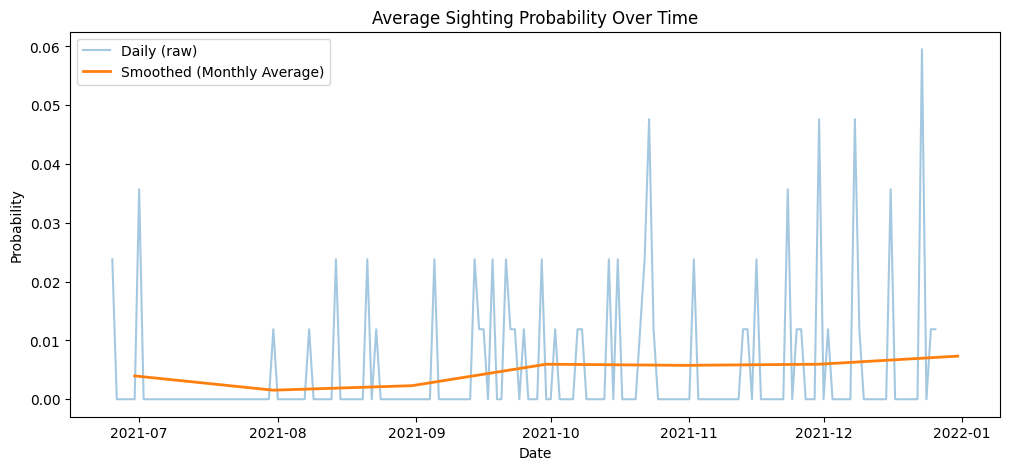

Index([2021-06-25, 2021-06-26, 2021-06-27, 2021-06-28, 2021-06-29, 2021-06-30,
       2021-07-01, 2021-07-02, 2021-07-03, 2021-07-04,
       ...
       2021-12-17, 2021-12-18, 2021-12-19, 2021-12-20, 2021-12-21, 2021-12-22,
       2021-12-23, 2021-12-24, 2021-12-25, 2021-12-26],
      dtype='object', name='date', length=185)
camera_id  Species  
C001       BUSHBUCK     0.010811
           IMPALA       0.005405
           MONKEY       0.016216
           WARTHOG      0.010811
           WATERBUCK    0.005405
                          ...   
C014       IMPALA       0.000000
           MONKEY       0.000000
           WARTHOG      0.000000
           WATERBUCK    0.005405
           ZEBRA        0.000000
Length: 84, dtype: float64
Species
BUSHBUCK     0.002703
IMPALA       0.006564
MONKEY       0.003089
WARTHOG      0.006950
WATERBUCK    0.005405
ZEBRA        0.003475
dtype: float64


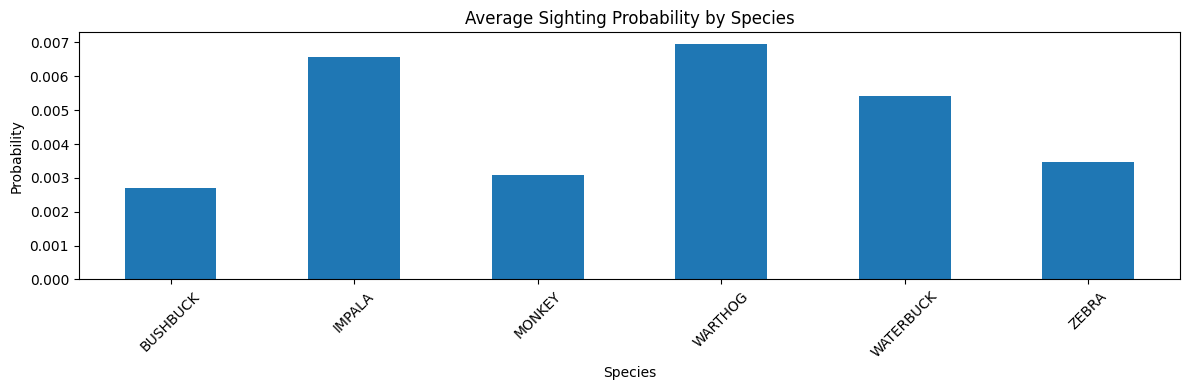

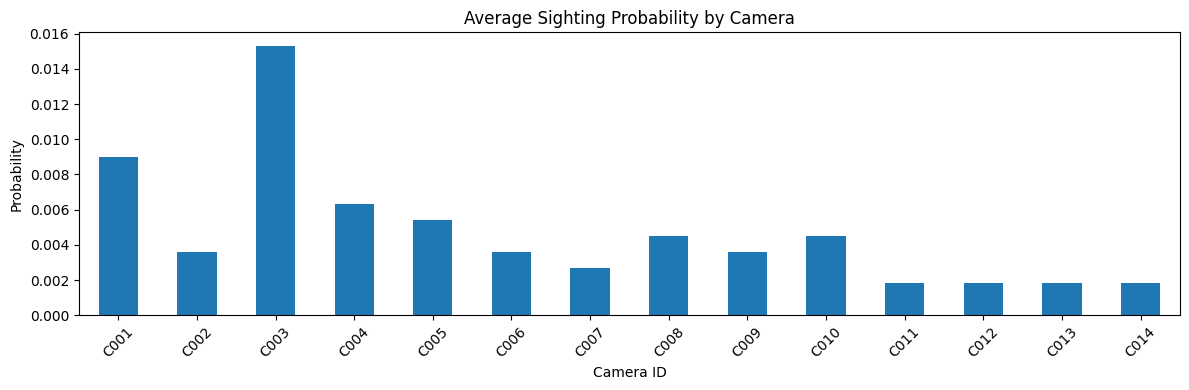

Top 5 most frequently sighted species:
Species
WARTHOG      0.006950
IMPALA       0.006564
WATERBUCK    0.005405
ZEBRA        0.003475
MONKEY       0.003089
dtype: float64

Top 5 most active cameras:
camera_id
C003    0.015315
C001    0.009009
C004    0.006306
C005    0.005405
C010    0.004505
dtype: float64


In [68]:
# Write your answer to Exercise 4 here
if not isinstance(binary_df.index, (pd.DatetimeIndex, pd.PeriodIndex, pd.TimedeltaIndex)):
        df = binary_df.copy()
        df.index = pd.to_datetime(df.index, errors="coerce")
df = df.sort_index()

# raw daily mean across all (camera, species)
avg_by_date_raw = df.mean(axis=1)


# set and apply smooth frequency
smooth_freq = "ME" # Monthly average, "YE" would be yearly
avg_by_date_smooth = avg_by_date_raw.resample(smooth_freq).mean()

# plot raw + smoothed
plt.figure(figsize=(12, 5))
plt.plot(avg_by_date_raw.index, avg_by_date_raw.values, alpha=0.4, label="Daily (raw)")
plt.plot(avg_by_date_smooth.index, avg_by_date_smooth.values, linewidth=2, label=f"Smoothed (Monthly Average)")
plt.title("Average Sighting Probability Over Time")
plt.xlabel("Date"); plt.ylabel("Probability"); plt.legend()
plt.show()

#Print these commands to help you understand what they do
print(binary_df.index)
print(binary_df.mean(axis=0))
print(binary_df.mean(axis=0).groupby(level=1).mean())

#TODO Plot species and camera averages

# Species averages (across all cameras and dates)
species_avg = df.mean(axis=0).groupby(level=1).mean()

# Camera averages (across all species and dates)
camera_avg = df.mean(axis=0).groupby(level=0).mean()

# Plot species averages
plt.figure(figsize=(12, 4))
species_avg.plot(kind='bar')
plt.title('Average Sighting Probability by Species')
plt.xlabel('Species')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot camera averages
plt.figure(figsize=(12, 4))
camera_avg.plot(kind='bar')
plt.title('Average Sighting Probability by Camera')
plt.xlabel('Camera ID')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 5 most frequently sighted species:")
print(species_avg.sort_values(ascending=False).head())

print("\nTop 5 most active cameras:")
print(camera_avg.sort_values(ascending=False).head())

Extension: which of these relationships that you found are statistically
significant?

In [73]:
from scipy.stats import chi2_contingency

# Exercise 4 Extension: Statistical Significance

# Chi-squared test for independence between Camera and Species
# Flatten the dataframe for the contingency table
df_flat = df.stack().reset_index()
df_flat.columns = ['date', 'camera_species', 'present']

# Extract camera and species from the 'camera_species' column
df_flat['camera_id'] = df_flat['camera_species'].apply(lambda x: x[0])
df_flat['Species'] = df_flat['camera_species'].apply(lambda x: x[1])

# Create contingency table for Camera and Species
contingency_table_cam_species = pd.crosstab(index=df_flat['camera_id'],
                                            columns=df_flat['Species'],
                                            values=df_flat['present'],
                                            aggfunc='sum').fillna(0)

chi2_cam_species, p_cam_species, _, _ = chi2_contingency(contingency_table_cam_species)

print(f"\nChi-squared test for Camera and Species independence:")
print(f"Chi-squared statistic: {chi2_cam_species}")
print(f"P-value: {p_cam_species}")
if p_cam_species < 0.05:
    print("The relationship between Camera and Species is statistically significant (p < 0.05).")
else:
    print("The relationship between Camera and Species is not statistically significant (p >= 0.05).")

# Chi-squared test for independence between Date (Smoothed) and Species
# Reshape the dataframe to have date as index and species as columns, summing sightings across cameras
daily_species_sum = df.groupby(level=1, axis=1).sum()

# Resample to the smoothed frequency
daily_species_sum_smooth = daily_species_sum.resample(smooth_freq).sum()

# Create contingency table for Date (smoothed) and Species
# Convert counts to presence (1) or absence (0) for chi-squared
contingency_table_date_species = (daily_species_sum_smooth > 0).astype(int)

# Need to reshape or flatten for chi-squared test
# One way is to stack the dataframe and then create a contingency table
stacked_date_species = contingency_table_date_species.stack().reset_index()
stacked_date_species.columns = ['date', 'Species', 'present']
contingency_table_date_species_flat = pd.crosstab(stacked_date_species['date'], stacked_date_species['Species'], values=stacked_date_species['present'], aggfunc='sum').fillna(0)


chi2_date_species, p_date_species, _, _ = chi2_contingency(contingency_table_date_species_flat)

print(f"\nChi-squared test for Smoothed Date and Species independence:")
print(f"Chi-squared statistic: {chi2_date_species}")
print(f"P-value: {p_date_species}")
if p_date_species < 0.05:
    print("The relationship between Smoothed Date and Species is statistically significant (p < 0.05).")
else:
    print("The relationship between Smoothed Date and Species is not statistically significant (p >= 0.05).")


# Chi-squared test for independence between Date (Smoothed) and Camera
# Reshape the dataframe to have date as index and camera as columns, summing sightings across species
daily_camera_sum = df.groupby(level=0, axis=1).sum()

# Resample to the smoothed frequency
daily_camera_sum_smooth = daily_camera_sum.resample(smooth_freq).sum()

# Create contingency table for Date (smoothed) and Camera
# Convert counts to presence (1) or absence (0) for chi-squared
contingency_table_date_camera = (daily_camera_sum_smooth > 0).astype(int)

# Need to reshape or flatten for chi-squared test
# One way is to stack the dataframe and then create a contingency table
stacked_date_camera = contingency_table_date_camera.stack().reset_index()
stacked_date_camera.columns = ['date', 'camera_id', 'present']
contingency_table_date_camera_flat = pd.crosstab(stacked_date_camera['date'], stacked_date_camera['camera_id'], values=stacked_date_camera['present'], aggfunc='sum').fillna(0)


chi2_date_camera, p_date_camera, _, _ = chi2_contingency(contingency_table_date_camera_flat)

print(f"\nChi-squared test for Smoothed Date and Camera independence:")
print(f"Chi-squared statistic: {chi2_date_camera}")
print(f"P-value: {p_date_camera}")
if p_date_camera < 0.05:
    print("The relationship between Smoothed Date and Camera is statistically significant (p < 0.05).")
else:
    print("The relationship between Smoothed Date and Camera is not statistically significant (p >= 0.05).")

/tmp/ipython-input-4082009958.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = df.stack().reset_index()


ValueError: Length mismatch: Expected axis has 16 elements, new values have 3 elements

## Address: Naive Bayesian Prediction Model

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-naive-bayes.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-naive-bayes.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Using the data we collected in the Access stage and understood in
Assess, we can now Address our question, and create a naive Bayesian
classification model for predicting the probability of a camera sighting
a species on a given day.

$$
P(1 \mid c, s, d) = \frac{P(1, c, s, d)}{P(c, s, d)}
$$

$$
\text{Using chain rule:} \quad P(1, c, s, d) = P(1) \cdot P(c, s, d \mid 1)
$$

$$
\text{Using conditional independence:} \quad P(c, s, d \mid 1) = P(c \mid 1) \cdot P(s \mid 1) \cdot P(d \mid 1)
$$

$$
P(1 \mid c, s, d) = \frac{P(1) \cdot P(c \mid 1) \cdot P(s \mid 1) \cdot P(d \mid 1)}{P(c,s,d)}
$$

$$
\text{Using Bayes' rule:} \quad  P(c \mid 1) = \frac{P(1 \mid c) \cdot P(c)}{P(1)} \quad \text{(and similarly for $s$ and $d$)}
$$

$$
\Rightarrow P(1 \mid c, s, d) = \frac{P(1) \cdot \frac{P(1 \mid c) \cdot P(c)}{P(1)} \cdot \frac{P(1 \mid s) \cdot P(s)}{P(1)} \cdot \frac{P(1 \mid d) \cdot P(d)}{P(1)}}{P(c,s,d)}
$$

$$
= \frac{P(1 \mid c) \cdot P(1 \mid s) \cdot P(1 \mid d) \cdot P(c) \cdot P(s) \cdot P(d)}{P(1)^2 \cdot P(c,s,d)}
$$

$$
\text{Assuming independence:}
$$

$$
P(1 \mid c,s,d)=\frac{P(1 \mid c) \cdot P(1 \mid s) \cdot P(1 \mid d)}{P(1)^2}
$$

$$
\begin{align*}
&c = \text{camera ID (e.g., C001)} \\
&s = \text{species (e.g., IMPALA)} \\
&d = \text{smoothed date (e.g., month, or Gaussian-filtered day)}
\end{align*}
$$

### Exercise 5

Implement the model below.

In [77]:
# Write your answer to Exercise 5 here


from typing import Union
import pandas as pd
import numpy as np
from datetime import date as DateType

def bayes_sighting_probability(df, camera, species, date) -> float:
    """
    Removes a specific observation and estimates the probability of sighting
    a given species at a given camera on a specific date.

    Parameters:
        df (pd.DataFrame): DataFrame with MultiIndex columns (camera, species) and datetime.date index.
        camera (str): Camera ID (e.g. 'C001').
        species (str): Species name (e.g. 'IMPALA').
        date (str or datetime.date or pd.Timestamp): Date of the observation.

    Returns:
        float: Estimated sighting probability - TODO.
    """
    if isinstance(date, str) or isinstance(date, pd.Timestamp):
        date = pd.to_datetime(date).date()

    df_blind = df.copy()
    df_blind.loc[date, (camera, species)] = None

    #TODO
    # Calculate base probabilities
    # P(1) - overall probability of a sighting
    total_observations = df_blind.count().sum()
    total_sightings = df_blind.sum().sum()
    p_sighting = total_sightings / total_observations if total_observations > 0 else 0.01

    # P(1|c) - probability of sighting given camera
    camera_cols = [col for col in df_blind.columns if col[0] == camera]
    if camera_cols:
        camera_data = df_blind[camera_cols]
        camera_observations = camera_data.count().sum()
        camera_sightings = camera_data.sum().sum()
        p_sighting_given_camera = camera_sightings / camera_observations if camera_observations > 0 else p_sighting
    else:
        p_sighting_given_camera = p_sighting

    # P(1|s) - probability of sighting given species
    species_cols = [col for col in df_blind.columns if col[1] == species]
    if species_cols:
        species_data = df_blind[species_cols]
        species_observations = species_data.count().sum()
        species_sightings = species_data.sum().sum()
        p_sighting_given_species = species_sightings / species_observations if species_observations > 0 else p_sighting
    else:
        p_sighting_given_species = p_sighting

    # P(1|d) - probability of sighting given date (using month as smoothing)
    date_month = pd.to_datetime(date).month
    date_data = df_blind[df_blind.index.to_series().apply(lambda x: pd.to_datetime(x).month == date_month)]
    if len(date_data) > 0:
        date_observations = date_data.count().sum()
        date_sightings = date_data.sum().sum()
        p_sighting_given_date = date_sightings / date_observations if date_observations > 0 else p_sighting
    else:
        p_sighting_given_date = p_sighting

    # Apply naive Bayes formula: P(1|c,s,d) = P(1|c) * P(1|s) * P(1|d) / P(1)^2
    # Add small epsilon to avoid division by zero
    epsilon = 1e-10
    p_sighting = max(p_sighting, epsilon)

    probability = (p_sighting_given_camera * p_sighting_given_species * p_sighting_given_date) / (p_sighting ** 2)

    # Clip to valid probability range
    probability = np.clip(probability, 0.0, 1.0)

    return float(probability)

    raise NotImplementedError("Prediction logic not implemented yet.")




Well done! We should now have a working Access-Assess-Address data
science pipeline! Let’s see how it does.

In [79]:
# Test the function with a sample prediction
test_prob = bayes_sighting_probability(binary_df, 'C001', 'ZEBRA', '2021-12-25')
print(f"Test prediction probability: {test_prob:.6f}")

Test prediction probability: 0.010410


### Evaluation

The data is extremely sparse, with less than 1% of values being `1`.
This is a challenge, as checking naive accuracy would make always-zero a
very very good predictor.

Let’s evaluate our prediction system using `log-loss`
i.e. `cross-entropy`:

$$
\mathcal{L} = - \frac{1}{N} \sum_{i=1}^{N}
\Big[
    y_i \, \log(\hat{p}_i) + (1 - y_i) \, \log(1 - \hat{p}_i)
\Big]
$$

### Exercise 6

Implement the loss function below.

In [65]:
# Write your answer to Exercise 6 here


def cross_entropy(y_true, y_pred):
    #TODO
    raise NotImplementedError("Cross entropy not implemented yet.")

def evaluate_prediction_system(df, your_function, max_samples=1000):
    # Randomly sample up to 1000, if full evaluation taking too long
    np.random.seed(42)
    coords = [(date, camera, species) for date in df.index for (camera, species) in df.columns]
    if len(coords) > max_samples:
        coords = np.random.choice(len(coords), size=max_samples, replace=False)
        coords = [coords[i] if isinstance(coords[i], tuple) else
                  [(date, camera, species) for date in df.index for (camera, species) in df.columns][coords[i]]
                  for i in range(len(coords))]
    else:
        coords = coords

    y_true = []
    y_pred = []

    for date, camera, species in coords:
        value = df.loc[date, (camera, species)]
        y_true.append(value)
        prob = your_function(df, camera, species, date)
        y_pred.append(prob)

    return cross_entropy(y_true, y_pred)

# Let's pass our function to be evaluated. This could take quite some time if your function is complex.
evaluate_prediction_system(binary_df, bayes_sighting_probability)



NotImplementedError: Prediction logic not implemented yet.

For reference, predicting a constant probability (eg. 0.5%) gives a loss
of around 0.026. This should be the benchmark number we want to improve
on. If your model does better than that, well done!

*Note: our approach included look-ahead bias - making predictions based
on data that we would not have access to at the time. For real-life
deployment, we would need to limit our training data to before
individual test cases.*

## Improving the Method: Correlated Variables

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-correlation-analysis-improvements.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-correlation-analysis-improvements.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The model above was quite simplified, and it disregarded any
correlations between the three variables. Since cameras are close to
each other, maybe they are more likely to capture the same animals on
the same day? Maybe some animals like or avoid some areas, or some other
animals? If any of the above is true, we can’t really be using simple
Bayes’ rule classification.

### Exercise 7

Analyse the data again to find the strongest relationships which can be
used to improve predictions. Plot correlation matrices and other helpful
charts.

Have a short read through the [DSAIL-Porini
paper](https://www.sciencedirect.com/science/article/pii/S2352340922010666)
for inspiration about other probability analyses that can be done here.

In [ ]:
# Write your answer to Exercise 7 here






Extension: Use what you found to improve your prediction model, and
compare it against the previous one.

In [ ]:
from typing import Union
import pandas as pd
import numpy as np
from datetime import date as DateType

def improved_sighting_probability(df, camera, species, date) -> float:
    """
    Removes a specific observation and estimates the probability of sighting
    a given species at a given camera on a specific date.

    Parameters:
        df (pd.DataFrame): DataFrame with MultiIndex columns (camera, species) and datetime.date index.
        camera (str): Camera ID (e.g. 'C001').
        species (str): Species name (e.g. 'IMPALA').
        date (str or datetime.date or pd.Timestamp): Date of the observation.

    Returns:
        float: Estimated sighting probability - TODO.
    """
    if isinstance(date, str) or isinstance(date, pd.Timestamp):
        date = pd.to_datetime(date).date()

    df_blind = df.copy()
    df_blind.loc[date, (camera, species)] = None

    #TODO

    raise NotImplementedError("Prediction logic not implemented yet.")

## Extended Exercises

We didn’t use all of the available data when we just classified days as
“sighting” or “no sighting.” Extend your analysis to include all the
information in the file, like numbers of sightings and numbers of
animals in the photos.

This will be quite challenging due to burst shots - assess the dataset
and come up with a good definition of what a burst is, and a data
structure that has the information you chose as important.

Example burst data: - Camera, Date, Species - Time Start, Time End -
Number of photos - Average/most animals in a photo

*Particular challenge around deduplicating multi-species sightings.*

### Exercise 8

Use this additional data and repeat the analysis you did above. Aim to
further improve predictions and write a new function like
`burst_sighting_probability('C001', 'IMPALA', '2021-12-24')`.

In [ ]:
# Write your answer to Exercise 8 here






### Exercise 9

Compare the results and note the improvement (or lack thereof) against
the two previous prediction functions you created.

In [ ]:
# Write your answer to Exercise 9 here






### Exercise 10

What other benefits does your new system provide? Can you modify it to
provide more predictions, like the expected number of sightings, the
number of animals?

In [ ]:
# Write your answer to Exercise 10 here






## Database Integration with SQLite

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-sqlite-database-creation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/dsail-porini-sqlite-database-creation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Throughout the course you will work with various datasets and data
formats. An SQL database is one of the most common ways to store large
amounts of data. We recognise that many of you may be familiar with this
already, but let’s use this example to build a small toy database of
animal sightings based on the excel file and the dataframes we created.

### Exercise 11

-   Create a local database (eg. `sqlite3`).
-   Add a table with animal sighting data.
-   Add a table with camera coordinates data.
-   Set indices on columns you might search by (eg. `CameraID`, `Date`).
    Make sure the index types make sense!
-   Look into multi column indices, and set one on `Latitude` and
    `Longitude`.
-   Demonstrate success with a couple SQL queries, eg. counting `IMPALA`
    sightings within a `200m` square around `-0.3866, 36.9649`.

Helpful links:

[SQL Intro, Creating Tables, Indices,
Joins](https://www.w3schools.com/sql/sql_intro.asp)

[Multi-Column
Indices](https://stackoverflow.com/questions/179085/multiple-indexes-vs-multi-column-indexes)

Remember to include reusable code from this and previous exercises in
your Fynesse library!

In [ ]:
# Write your answer to Exercise 11 here






## Extended Analysis: Burst Detection

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-burst-detection-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/dsail-porini-burst-detection-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We didn’t use all of the available data when we just classified days as
“sighting” or “no sighting.” Change your analysis to include the number
of sightings and the number of animals in the photos.

This will be quite challenging due to burst shots - assess the dataset
and come up with a good definition of what a burst is, and a data
structure that has the information you chose as important.

Example burst data: - Camera, Date, Species - Time Start, Time End -
Number of photos - Average/most animals in a photo

Particular hardship around deduplicating multi-species sightings.

### Exercise 12

Use this additional data and repeat the analysis you did above. Further
improve predictions and write a new function like
`burst_sighting_probability('C001', 'IMPALA', '2021-12-24')`.

In [ ]:
# Write your answer to Exercise 12 here






### Exercise 13

Compare the results and note the improvement (or lack thereof) against
the two previous prediction functions you created.

In [ ]:
# Write your answer to Exercise 13 here






### Exercise 14

What other benefits does your new system provide? Can you modify it to
provide more predictions, like the expected number of sightings, the
number of animals?

In [ ]:
# Write your answer to Exercise 14 here






End of Practical 3

     _______  __   __  _______  __    _  ___   _  _______  __
    |       ||  | |  ||   _   ||  |  | ||   | | ||       ||  |
    |_     _||  |_|  ||  |_|  ||   |_| ||   |_| ||  _____||  |
      |   |  |       ||       ||       ||      _|| |_____ |  |
      |   |  |       ||       ||  _    ||     |_ |_____  ||__|
      |   |  |   _   ||   _   || | |   ||    _  | _____| | __
      |___|  |__| |__||__| |__||_|  |__||___| |_||_______||__|

::: {.cell .markdown}

## References